In [1]:
import logit
import matplotlib.pyplot as plt

import importlib
importlib.reload(logit)

<module 'logit' from '/li_zhengdao/github/logvis/logit.py'>

loaded previous DB!!


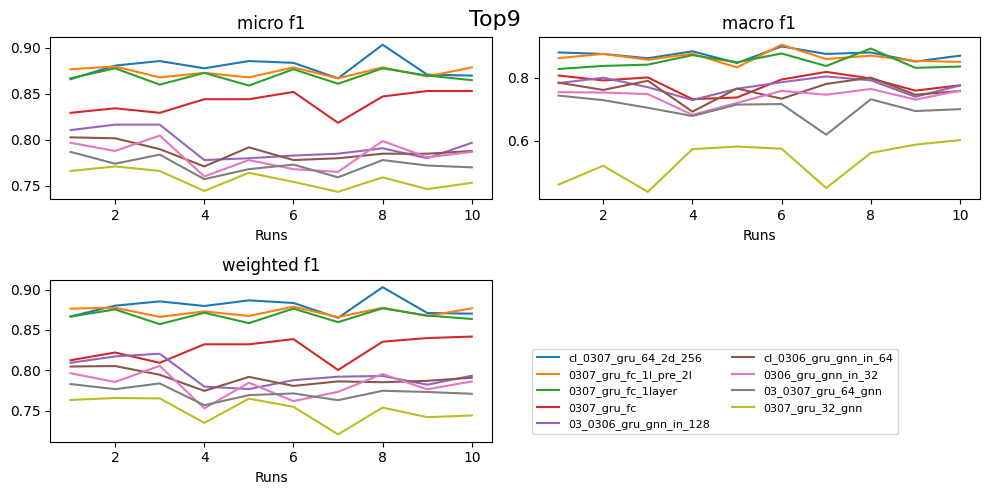

In [2]:
without_list = ['adj10','seizure', 'freq', 'shared']
and_with_list = []
or_with_list = ['2d','gnn']
# or_with_list = ['gnn','att','weighted']

def compare_sets(ll):
    for i in range(1, len(ll)):
        if ll[0] != ll[i]:
            return True
    return False

def plot_metrics(db, topK=5):
    
    xs = list(range(1, logit.MAX_RUNS+1))
    
    top_k, K = logit.filter_data(db, topK, without_list, and_with_list, or_with_list)
    
    fig = plt.figure(figsize=(10,5), dpi=100)
    fig.patch.set_facecolor('white')
    
    legend_labels = []
    for i, (m, d) in enumerate(top_k.items()):
        ax = fig.add_subplot(2, 2, i+1)
        legends = []
        yss = []
        for metrics in d:
            for k, v in metrics.items():
                legends.append(k)
                yss.append(v)
                if k == '0219_1d_strid2_8out_2d_512hid':
                    print(v)
        legend_labels.append(set(legends))
        for ys in yss:
            ax.plot(xs, ys)
        if len(yss) < 6:
            ax.legend(legends, ncol=2, fontsize=6, title_fontsize=3,loc='lower left')
        # ax.legend(legends, bbox_to_anchor=(0.5, -0.5), ncol=2, fontsize=6,title_fontsize=3,loc='lower center')
        ax.set_title(f'{m}')
        ax.set_xlabel('Runs')
    
    # compare legends:
    if compare_sets(legend_labels):
        print('Warning: legends not same!!!!!!!!!!!!!!!!!!!!!!!!!')
    fig.legend(legends, ncol=2, bbox_to_anchor=(0.72, 0.12), fontsize=8, loc='lower center')
        
    fig.tight_layout()
    fig.suptitle(f'Top{K}',fontsize=16)
    plt.show()

metrics = logit.load_DB()

plot_metrics(metrics, topK=5)